# Introduction to geospatial data

There are three different kinds of geospatial data:

1. Simple information on XY - coordinates. Indentify a point
2. Vector data (shape files; .shp). represents a shape, for example, street, district etc.
3. Raster data. Pixel data that is georeferenced

We also need to install a few libraries:

1. `geopandas`
2. `rasterio`
3. `geodatasets`

In [1]:
#!pip install geopandas

In [2]:
#!pip install rasterio

In [3]:
#!pip install geodatasets

In [4]:
#importing the libraries

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geodatasets import get_path

import warnings
warnings.filterwarnings('ignore')

D:\anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [5]:
# create a pd.DataFrame with lat/lon information

df = pd.DataFrame(
        {
            'City':['Buenos Aires','Brasilia','Santiago','Bogota','Caracas'],
            'Country':['Argentina','Brazil','Chile','Colombia','Venezuela'],
            'Latitude':[-34.58, -15.78, -33.45, 4.60, 10.48],
            'Longitude':[-58.66,-47.91,-70.08,-74.08,-66.86]
        })

In [6]:
df

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.08
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


In [7]:
# Need to make Python understand that lat/long is geospatial information
# We use geopandas for this.
# crs is coordinate reference system

gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.Longitude, df.Latitude),
                      crs = 'EPSG:4326')

In [8]:
gdf

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.08,POINT (-70.08000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


<Axes: >

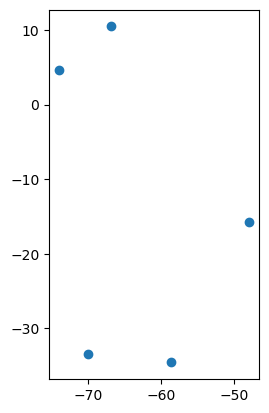

In [9]:
# plot points

gdf.plot()

In [10]:
# We need a proper background map to plot it against.

world_data = gpd.read_file('Visualizing Geodata/world.shp')

In [11]:
world_data

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
...,...,...,...,...,...,...,...,...,...,...,...,...
241,TB,BL,BLM,652,Saint Barthelemy,0,0,19,29,-63.043,18.040,"POLYGON ((-63.02834 18.01555, -63.03334 18.015..."
242,GK,GG,GGY,831,Guernsey,0,0,150,154,-2.576,49.459,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249..."
243,JE,JE,JEY,832,Jersey,0,0,150,154,-2.129,49.219,"POLYGON ((-2.01500 49.21416, -2.02111 49.17722..."
244,SX,GS,SGS,239,South Georgia South Sandwich Islands,0,0,0,0,-36.891,-54.209,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806..."


<Axes: >

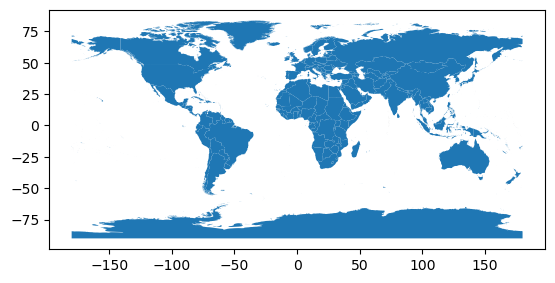

In [12]:
# we can plot the world
world_data.plot()

In [13]:
# Each country is represented by a particular geometry
world_data[['NAME','geometry']].head()

,NAME,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


In [14]:
# geopandas has a lot of functionality to explore our geometries
world_data.area #depends on crs

0        0.046183
1      213.512502
2        9.100912
3        3.075918
4        3.142093
          ...    
241      0.004696
242      0.009359
243      0.015408
244      0.542074
245      3.221167
Length: 246, dtype: float64

<Axes: >

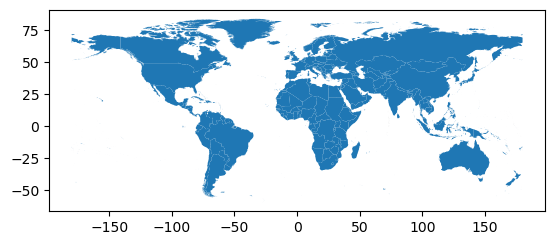

In [15]:
# we can customize our maps

world_data = world_data[world_data['NAME']!= 'Antarctica']
world_data.plot()

<Axes: >

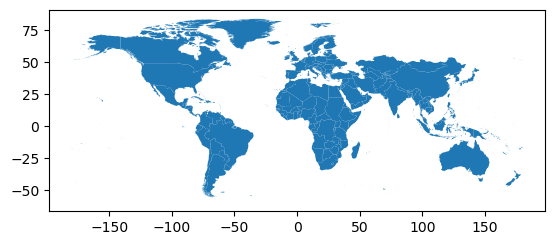

In [16]:
world_data[world_data['NAME']!= 'Russia'].plot()

<Axes: >

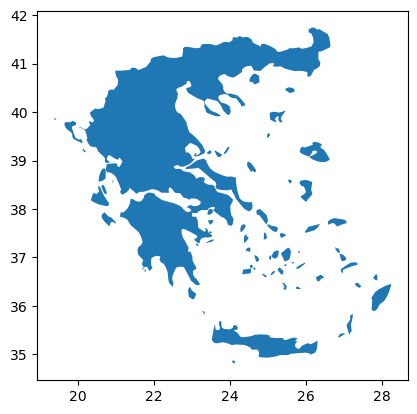

In [17]:
# we can plot just one country
world_data[world_data['NAME']=='Greece'].plot()

<Axes: >

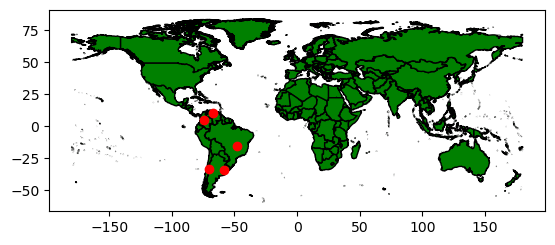

In [18]:
# now we want to plot our original cities data onto the world map
# first instantiate background axis
ax = world_data.plot(color = 'green', edgecolor ='black')

# now we plot our citites against that background

gdf.plot(ax = ax, color = 'red')

<Axes: >

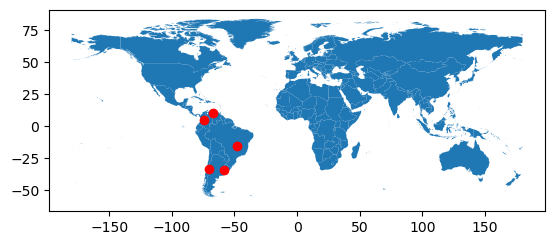

In [19]:
# now we want to plot our original cities data onto the world map
# first instantiate background axis
ax = world_data.plot()

# now we plot our citites against that background

gdf.plot(ax = ax, color = 'red')

In [35]:
# some fancier maps
from geodatasets

chicago = gpd.read_file(get_path('geoda.chicago_commpop'))


In [36]:
chicago.head()

,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,geometry
0,DOUGLAS,35,18238,26470,-8232,-31.099358,0,1,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,36,5918,6110,-192,-3.142390,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,37,2876,3420,-544,-15.906433,0,1,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,38,21929,28006,-6077,-21.698922,0,1,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,39,17841,18363,-522,-2.842673,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."


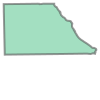

In [21]:
chicago.geometry[4]

In [22]:
chicago.geometry[1].area

0.000170283253207979

<Axes: >

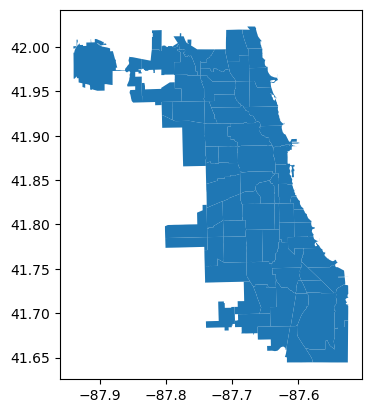

In [23]:
chicago.plot()

<Axes: >

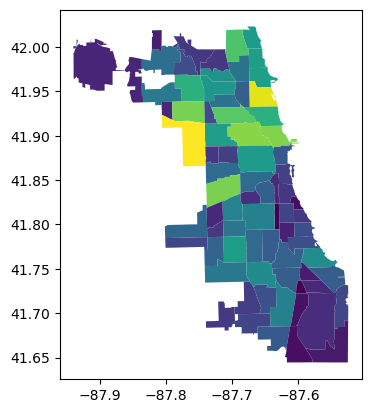

In [24]:
# We want to see where most people live here!
chicago.plot(column = 'POP2010')

<Axes: >

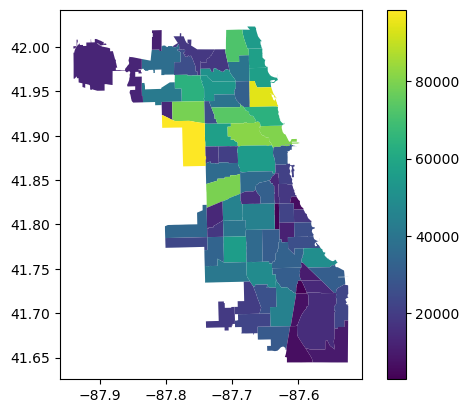

In [25]:
# add legend

chicago.plot(column = 'POP2010', legend = True)

<Axes: >

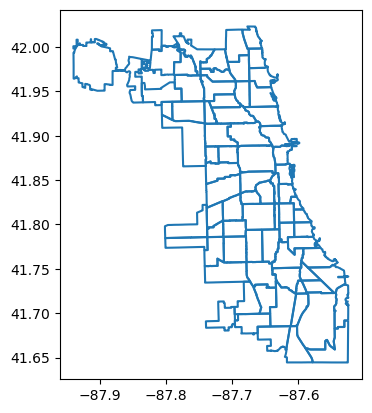

In [26]:
# just plot boundaries

chicago.boundary.plot()

In [27]:
# Get some geospatial data on grocery stores

groceries = gpd.read_file(geodatasets.get_path('geoda.groceries'))

In [28]:
groceries

,OBJECTID,Ycoord,Xcoord,Status,Address,Chain,Category,geometry
0,16,41.973266,-87.657073,OPEN,"1051 W ARGYLE ST, CHICAGO, IL. 60640",VIET HOA PLAZA,None,MULTIPOINT (1168268.672 1933554.350)
1,18,41.696367,-87.681315,OPEN,"10800 S WESTERN AVE, CHICAGO, IL. 60643-3226",COUNTY FAIR FOODS,None,MULTIPOINT (1162302.618 1832900.224)
2,22,41.868634,-87.638638,OPEN,"1101 S CANAL ST, CHICAGO, IL. 60607-4932",WHOLE FOODS MARKET,None,MULTIPOINT (1173317.042 1895425.426)
3,23,41.877590,-87.654953,OPEN,"1101 W JACKSON BLVD, CHICAGO, IL. 60607-2905",TARGET/SUPER,new,MULTIPOINT (1168996.475 1898801.406)
4,27,41.737696,-87.625795,OPEN,"112 W 87TH ST, CHICAGO, IL. 60620-1318",FOOD 4 LESS,None,MULTIPOINT (1176991.989 1847262.423)
...,...,...,...,...,...,...,...,...
143,585,41.880834,-87.647729,Chicago-West Loop,"40 S Halsted St, Chicago, IL 60661",Mariano's,None,MULTIPOINT (1171065.063 1899839.376)
144,586,41.920842,-87.669112,NewLocation,"2112 N Ashland Ave, Chicago IL 60614",Mariano's,None,MULTIPOINT (1165217.798 1914159.975)
145,587,41.835930,-87.664034,Chicago-Bridgeport,"3145 S Ashland Ave, Chicago, IL 60608",Mariano's,None,MULTIPOINT (1166186.713 1883581.309)
146,588,41.859370,-87.630062,Chicago-South Loop,"1615 S Clark St, Chicago, IL 60616",Mariano's,None,MULTIPOINT (1175778.816 1892214.445)


<Axes: >

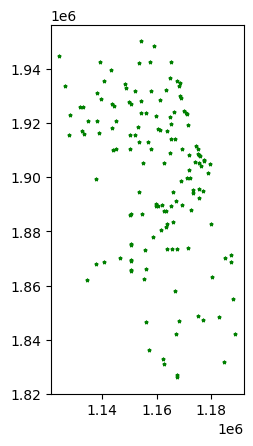

In [29]:
groceries.plot(marker = '*', color ='green', markersize = 5)

<Axes: >

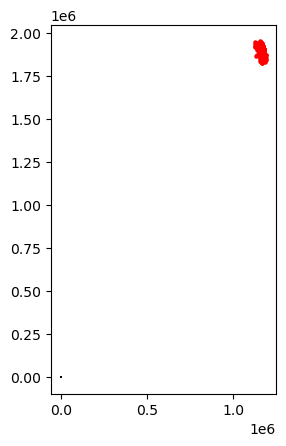

In [30]:
# plot groceries store onto chicago map

base = chicago.plot(color = 'white', edgecolor = 'black')

groceries.plot(ax = base, marker = 'o', color = 'red', markersize = 5)

In [31]:
# Something went wrong. Maybe different coordinate reference systems.

print(chicago.crs)
print(20*'=====')
print(groceries.crs) # they are different crs

EPSG:4326
PROJCS["Transverse_Mercator",GEOGCS["GCS_GRS 1980(IUGG, 1980)",DATUM["D_unknown",SPHEROID["GRS80",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",36.6666666666667],PARAMETER["central_meridian",-88.3333333333333],PARAMETER["scale_factor",0.999975],PARAMETER["false_easting",984250],PARAMETER["false_northing",0],UNIT["US survey foot",0.304800609601219,AUTHORITY["EPSG","9003"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [32]:
# let's change the groceries crs to the chicago one

groceries.to_crs(chicago.crs, inplace = True)

<Axes: >

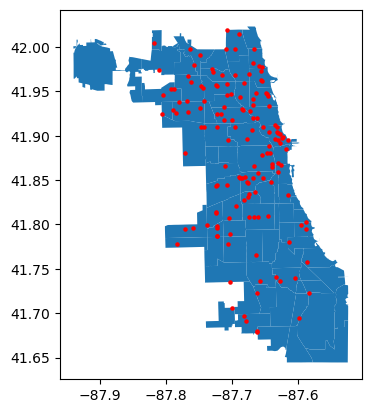

In [33]:
# plot groceries store onto chicago map

base = chicago.plot()

groceries.plot(ax = base, marker = 'o', color = 'red', markersize = 5)

<Axes: >

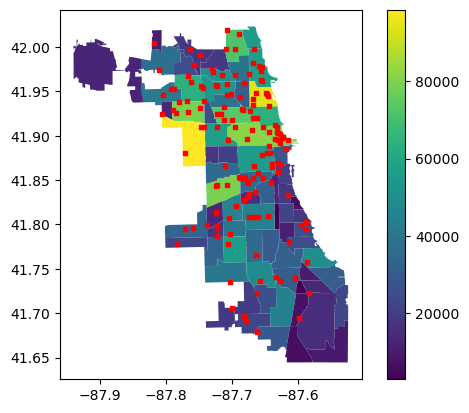

In [34]:
# Add information about POP2010 to this map.

base = chicago.plot(column = 'POP2010', legend = True)

# marker = 's' is square shape
groceries.plot(ax = base, marker = 's', color = 'red', markersize = 5)